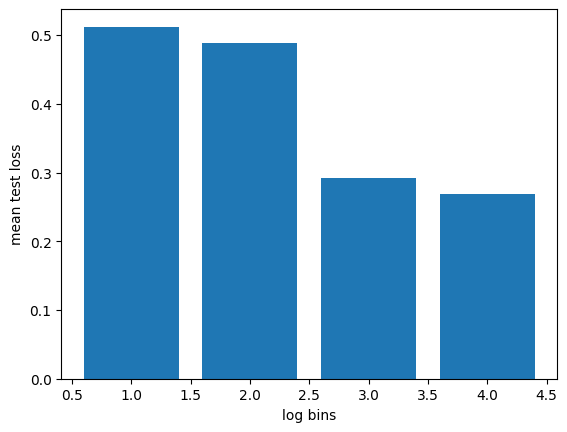

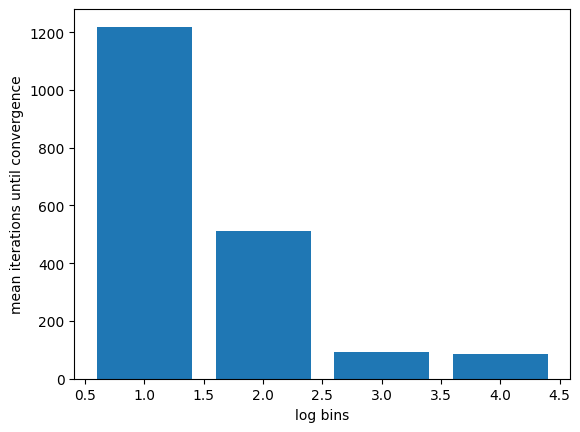

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))
"""
#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
"""
#loading sonar data
sonar_data = pd.read_csv("sonar.csv").to_numpy()
sonar_x = sonar_data[:,:-1]
sonar_x = scaler.fit_transform(sonar_x)
#add intercept
bias = np.ones((sonar_data.shape[0],1))
sonar_x = np.hstack((bias, sonar_x)).astype(float)
sonar_y = sonar_data[:,-1]
#convert labels to +1 -1
sonar_y = np.where(sonar_y == "M",1,-1)

bins = [1,2,3,4]

normal_iters, quant_iters,  w_quant, w = experiment(sonar_x,sonar_y, bins)

In [3]:
from QuantLog import quantlogistic
from NormalLog import normallogistic

#generate random w to test gradient func on
w_test = np.random.rand(sonar_x.shape[1]) *2 -1

loss, ng = normallogistic(w_test,sonar_x.T,sonar_y.T)
loss, qg1 = quantlogistic(w_test,sonar_x.T,sonar_y.T,1)
loss, qg2 = quantlogistic(w_test,sonar_x.T,sonar_y.T,2)
loss, qg3 = quantlogistic(w_test,sonar_x.T,sonar_y.T,3)

gradients = np.hstack((ng,qg1,qg2,qg3))
print(gradients)

[[ 0.30053404  0.09178744]
 [-0.2557725  -0.06825275]
 [-0.26139582 -0.07500657]
 [-0.26164997 -0.07368578]
 [-0.2720408  -0.07870284]
 [-0.23656724 -0.06955272]
 [-0.18533526 -0.05531862]
 [-0.14410328 -0.04436184]
 [-0.19447005 -0.05478272]
 [-0.23775208 -0.06298078]
 [-0.21994655 -0.06569924]
 [-0.22673879 -0.06871438]
 [-0.19936314 -0.06133793]
 [-0.16601043 -0.0565684 ]
 [-0.17973648 -0.06052123]
 [-0.14721513 -0.05552139]
 [-0.10548264 -0.04471819]
 [-0.0707318  -0.03045165]
 [-0.04178397 -0.02294598]
 [-0.05507289 -0.02836856]
 [-0.05815756 -0.01049215]
 [-0.01624413  0.01908844]
 [ 0.05075675  0.03779338]
 [ 0.09803846  0.05055699]
 [ 0.133273    0.05621454]
 [ 0.14961473  0.0645571 ]
 [ 0.15244589  0.07049926]
 [ 0.14637476  0.0635845 ]
 [ 0.10921703  0.04048007]
 [ 0.07748046  0.01667784]
 [ 0.01872323  0.00183675]
 [ 0.01848142  0.00401374]
 [-0.02170811 -0.00377595]
 [-0.04954521 -0.01880573]
 [-0.03238565 -0.01578305]
 [-0.03078518 -0.01537128]
 [-0.01272851 -0.01533622]
 